In [1]:
#各ライブラリのインポート
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
#経過時間ごとのアクセス数のデータをタブ区切りで読み込む
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00 1.656e+03]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [3]:
#経過時間の列（０）をｘに格納
x = data[:, 0]
#アクセス数の列（１）をｙに格納
y = data[:, 1]

#isnanメソッドを使って欠損値を表示
print("欠損値:", sp.sum(sp.isnan(y)))

#欠損値を除外
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

欠損値: 4


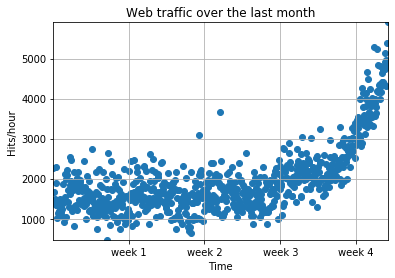

In [4]:
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [5]:
#誤差を定義する。
def error(f,x,y):
    return sp.sum(((f(x)-y))**2)
#実際のデータとモデルが予測した値のユークリッド平方距離を合計して誤差とする。

In [6]:
#直線で近似してみる。
fp1, residuals, rank, sv, rcond = sp.polyfit(x,y,1,full=True)
#polyfit 関数は近似したモデル関数をfp1で返す。
#full＝True　を指定することで、近似プロセスについて情報を得ることができる。
#ｘは入力、ｙは出力、１は、ｘとｙの多項式の次元を表す。１なので直線
#近似誤差を表すのが residuals
print("Model parameters: %s" % fp1)
print(residuals)

Model parameters: [   2.56140278 1009.17153379]
[3.18104549e+08]


この結果が表すのは、
f(x)= 2.56140278 * x + 1009.17153379
が、２乗和誤差が最小となる近似関数であるということ。

In [7]:
#poly1d()を用いることで、モデルパラメータからモデル関数を作れる。
f1 = sp.poly1d(fp1)
print(error(f1,x,y))

318104548.81995213


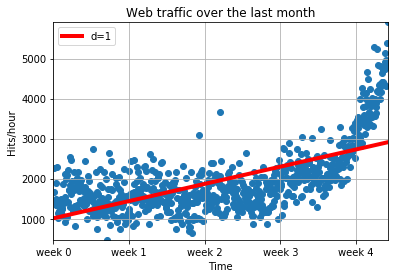

In [8]:
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()

#f1()を使って、訓練データから学習したモデルを描画してみる。
fx = sp.linspace(0,x[-1],1000) #プロット用に"x値"を生成
plt.plot(fx,f1(fx),linewidth=4,c='red')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.show()

はじめの４週（Week0~Week3）は、なんとなくあってそうですが、最終週は明らかに違っています。  
誤差の「318104548.81995213」も、これだけではよいのか悪いのか判断できません。  
しかしながら、この単純なモデルを基準として、新しく作ったモデルの誤差を比較することで、より良いモデルかどうか判断することができるようになります。
そして、またそのモデルを基準として、さらに良いモデルを判断していくという作業を繰り返していく作業ができます。

## 次数が２の多項式曲線

In [13]:
#次数が２の多項式曲線（二次曲線）で近似してみる。
fp2 = sp.polyfit(x,y,2)
print("Model parameters: %s" % fp2)


Model parameters: [ 1.04553117e-02 -5.21750402e+00  1.97446557e+03]


このモデル関数は、以下になります。  
f(x)= 1.04553117e-02 * x**2 + -5.21750402e+00 * x + 1.97446557e+03  


In [14]:
#求めたパラメータから、２次の多項式曲線モデル関数を作る。
f2 = sp.poly1d(fp2)
#誤差を求める。
print(error(f2,x,y))

180977929.6253154


先ほどの直線近似よりも、誤差が小さくなっている。

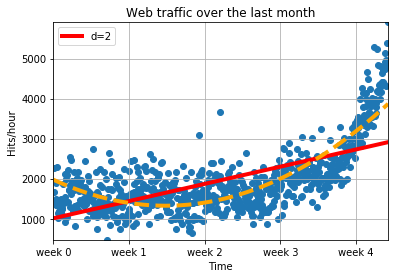

In [21]:
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()

#f1()を使って、訓練データから学習したモデルを描画してみる。
fx = sp.linspace(0,x[-1],1000) #プロット用に"x値"を生成
plt.plot(fx,f1(fx),linewidth=4,c='red')
plt.legend(["d=%i" % f1.order], loc="upper left")

#f2()を使って、訓練データから学習したモデルを描画してみる。
plt.plot(fx,f2(fx),linestyle="--",linewidth=4,c='orange')
plt.legend(["d=%i" % f2.order], loc="upper left")


plt.show()

In [24]:
#次数が３、１０、１００の多項式曲線で近似してみる。


/Users/jitaku_imac/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/jitaku_imac/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/jitaku_imac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


In [25]:
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))


/Users/jitaku_imac/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/jitaku_imac/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/jitaku_imac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
def plot_models(x, y, models, mx=None, ymax=None, xmin=None):
    plt.figure(figsize=(10, 5))
    plt.clf()
    plt.scatter(x, y, c='orange', s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.show

In [48]:
# all examples will have three classes in this file
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', '-', '-']

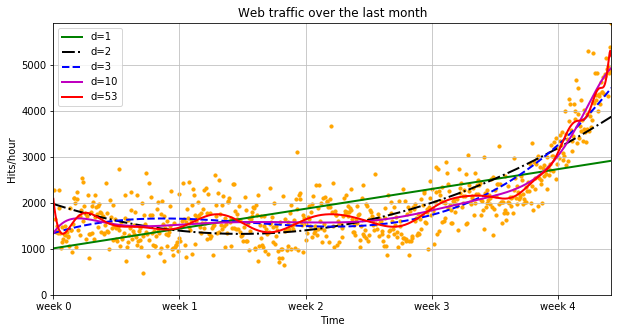

In [49]:
plot_models(x, y, [f1, f2, f3, f10, f100])